In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [11]:
#Load data

path = "/Users/raaghav/Desktop/ML_projects/Melbourne_Min_Temp_Analysis/daily-minimum-temperatures-in-me.csv"
df = pd.read_csv(
    path,
    parse_dates=[0],
    index_col=0,
    on_bad_lines="skip"
)

df.head()



,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [12]:
df.columns

Index(['Daily minimum temperatures in Melbourne, Australia, 1981-1990'], dtype='object')

In [ ]:
df.columns = ['min_temp']

df.dtypes


min_temp    object
dtype: object

In [24]:
#Converting to numeric
df['min_temp'] = pd.to_numeric(df['min_temp'],errors = 'coerce')

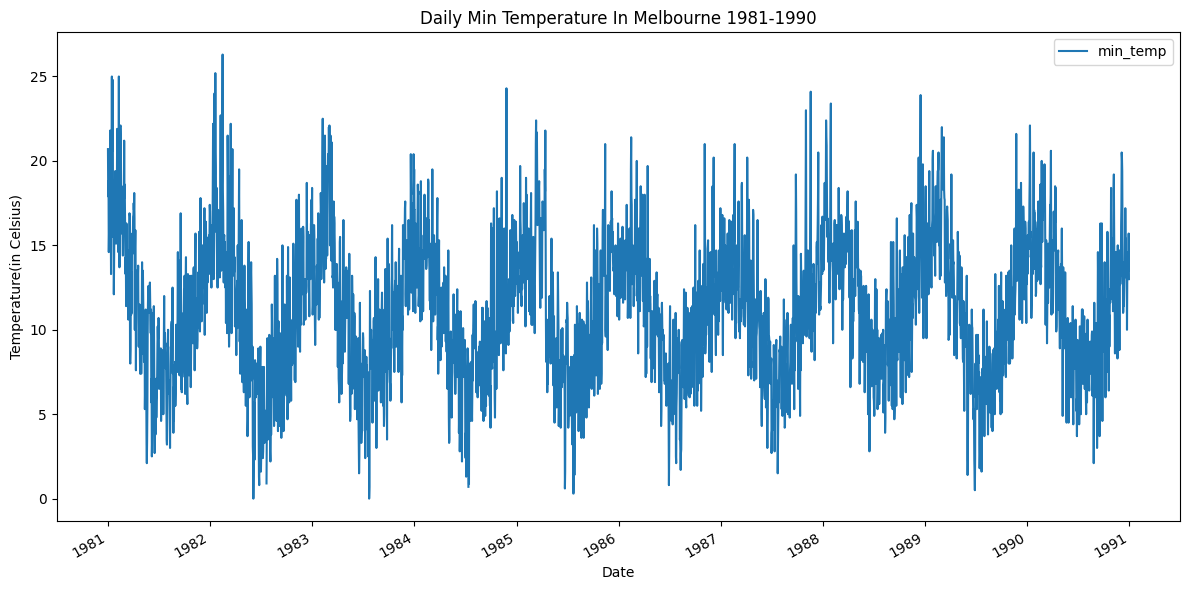

In [26]:
df.plot(figsize=(12,6),title = 'Daily Min Temperature In Melbourne 1981-1990')
plt.xlabel('Date')
plt.ylabel('Temperature(in Celsius)')
plt.tight_layout()
plt.show()

### Clearly there is seasonality within the data and is not stationary

In [29]:
df.isna().any().any()

np.True_

In [32]:
df[df.isna().any(axis =1)]

,min_temp
Date,
1982-07-20,NaN
1982-07-21,NaN
1984-07-14,NaN


### Since there are only 3 missing values we could 1. drop the values 2. impute with mean(not a good idea) 3. use linear interpolation

In [34]:
#linear interpolation of missing values
df['min_temp'] = df['min_temp'].interpolate(method = 'linear')

In [35]:
df.isna().sum()

min_temp    0
dtype: int64

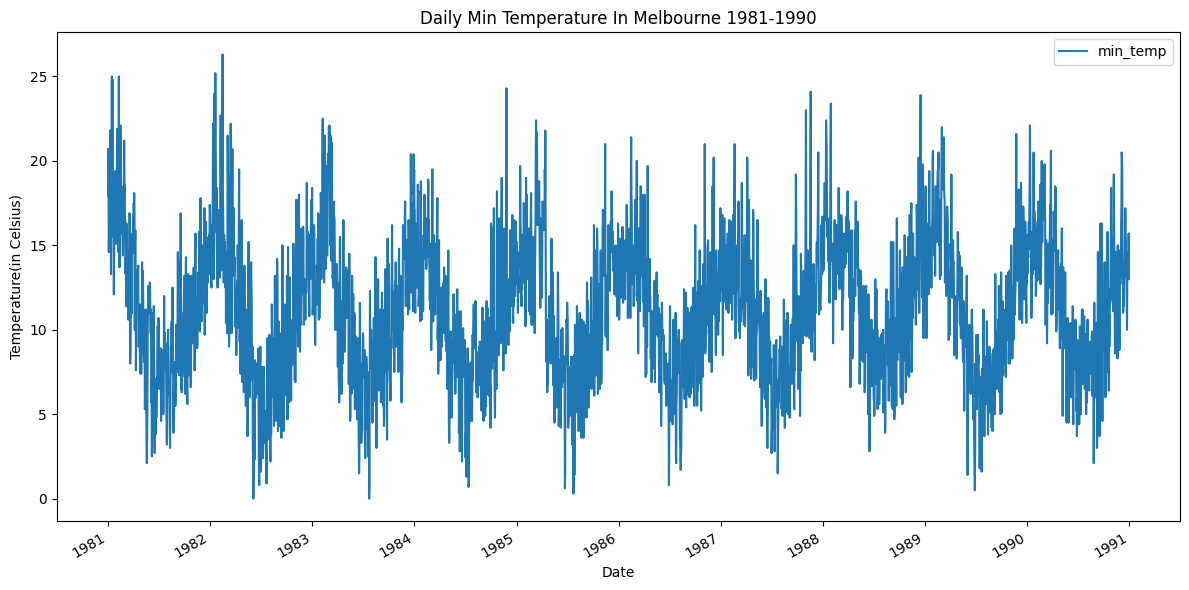

In [37]:
df.plot(figsize=(12,6),title = 'Daily Min Temperature In Melbourne 1981-1990')
plt.xlabel('Date')
plt.ylabel('Temperature(in Celsius)')
plt.tight_layout()
plt.show()